In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
plt.rcParams['figure.figsize'] = (6, 6)

In [9]:
# Criar a base de dados
df = pd.DataFrame({
    'x' : np.random.normal(10, 1.2, 20000),
    'y' : np.random.normal(10, 1.2, 20000),
    'group' : np.repeat('A', 20000)
})

tmp1 = pd.DataFrame({
    'x' : np.random.normal(14.5, 1.2, 20000),
    'y' : np.random.normal(14.5, 1.2, 20000),
    'group' : np.repeat('B', 20000)
})

tmp2 = pd.DataFrame({
    'x' : np.random.normal(9.5, 1.5, 20000),
    'y' : np.random.normal(15.5, 1.5, 20000),
    'group' : np.repeat('C', 20000)
})

df = df.append(tmp1).append(tmp2)

In [11]:
df.head(5)

,x,y,group
0,9.437639,9.393657,A
1,10.108724,10.300238,A
2,9.975242,10.481029,A
3,11.385236,7.880232,A
4,10.913593,10.526259,A


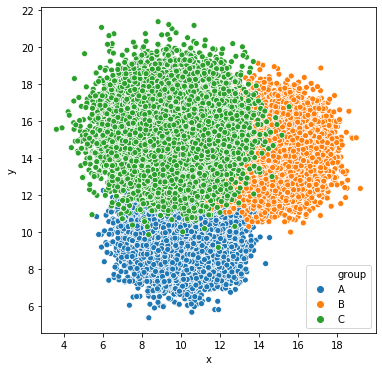

In [34]:
sns.scatterplot(df['x'], df['y'], hue=df['group'])
plt.show()

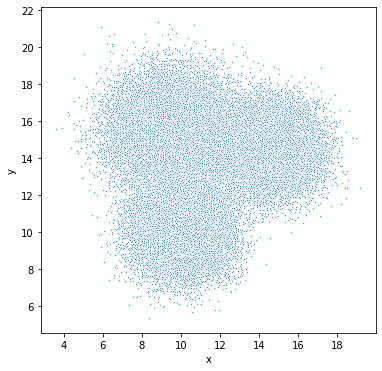

In [22]:
sns.scatterplot(df['x'], df['y'], s=3) #s = size
plt.show()

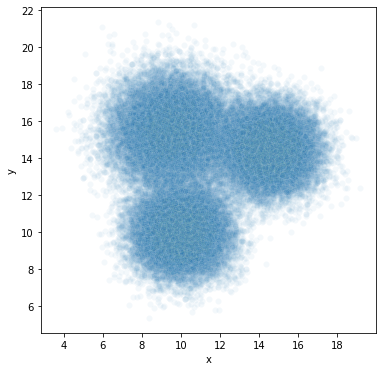

In [23]:
sns.scatterplot(df['x'], df['y'],alpha=0.05) #alpha = determina a transparência dos pontos
plt.show()

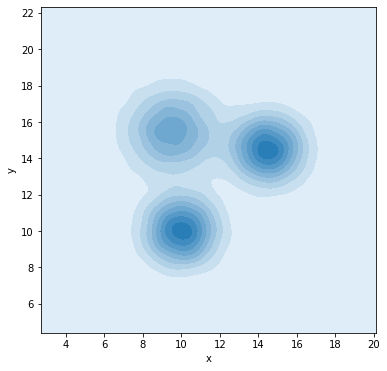

In [26]:
# Densidade
sns.kdeplot(df['x'], df['y'], shade = True)
plt.show()

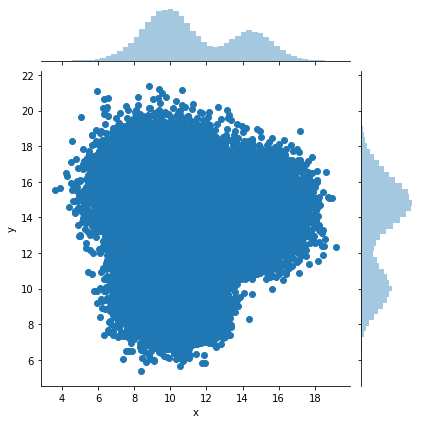

In [32]:
# Jointplot
sns.jointplot(df['x'], df['y'])
plt.show()

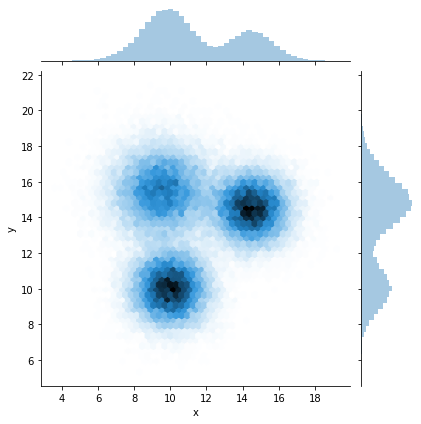

In [35]:
# Jointplot
sns.jointplot(df['x'], df['y'], kind ='hex')
plt.show()

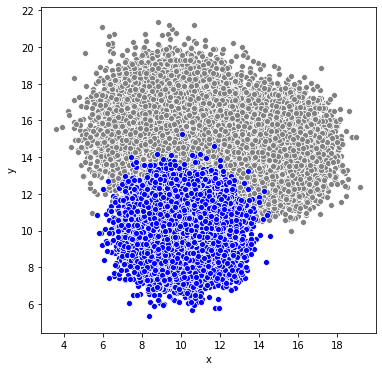

In [40]:
# Ênfase de dados
df_a = df[df['group'] == 'A']
df_restante= df[df['group'] != 'A']

# Plotando pontos que não são do grupo de ênfase
sns.scatterplot(df_restante['x'], df_restante['y'], color = 'grey')

# Plotando ponto que são do grupo de ênfase
sns.scatterplot(df_a['x'], df_a['y'], color='blue')


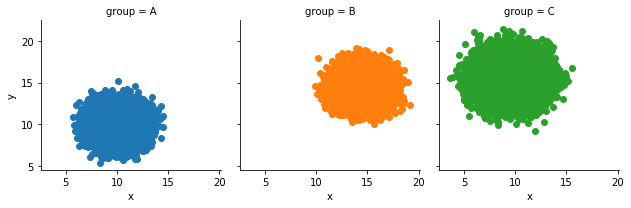

In [42]:
# Facetamento

g = sns.FacetGrid(df, col='group', hue='group')
g = g.map(plt.scatter, 'x', 'y')
plt.show()

In [44]:
a = np.concatenate([
                    np.random.normal(2, 4, 1000),
                    np.random.normal(4, 4, 1000),
                    np.random.normal(1, 2,  500),
                    np.random.normal(10, 2, 500),
                    np.random.normal(8, 4, 1000),
                    np.random.normal(10, 4, 1000)
])

df = pd.DataFrame({
    'x': np.repeat(range(1,6), 1000),
    'y': a
})

In [46]:
df.head(5)

,x,y
0,1,4.899472
1,1,-1.969845
2,1,4.194898
3,1,2.858707
4,1,5.597394


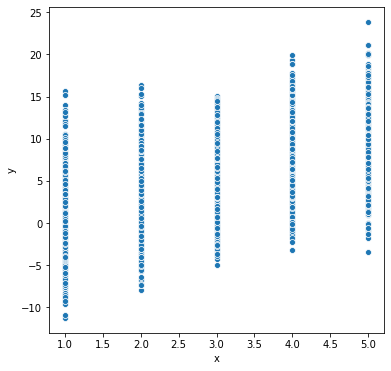

In [48]:
sns.scatterplot(df['x'],df['y'])
plt.show()

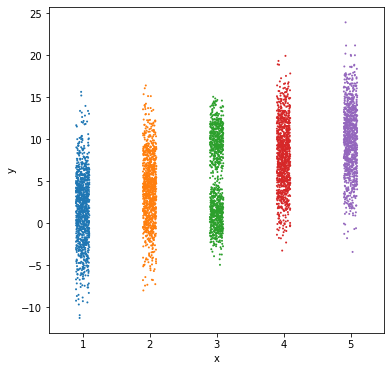

In [51]:
sns.stripplot(df['x'],df['y'], size = 2)
plt.show()

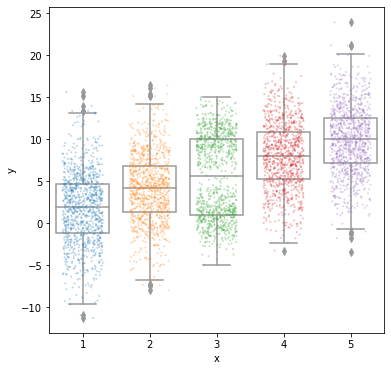

In [58]:
sns.stripplot(df['x'],df['y'], size = 2,  alpha = 0.3 , jitter =0.3)
sns.boxplot(df['x'], df['y'], color='white')
plt.show()

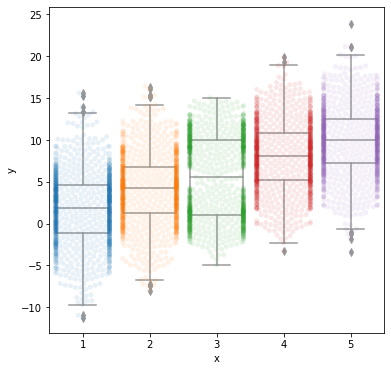

In [60]:
sns.swarmplot(df['x'],df['y'],alpha = 0.1)
sns.boxplot(df['x'], df['y'], color='white')
plt.show()

In [62]:
df = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/meses_producao_custo.csv')

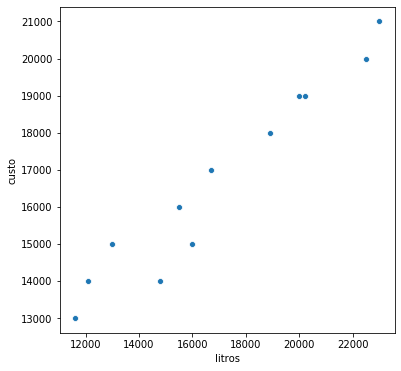

In [64]:
sns.scatterplot(df['litros'], df['custo'])
plt.show()

In [67]:
df.corr()

,litros,custo
litros,1.000000,0.969993
custo,0.969993,1.000000


/home/alebark/Softwares/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


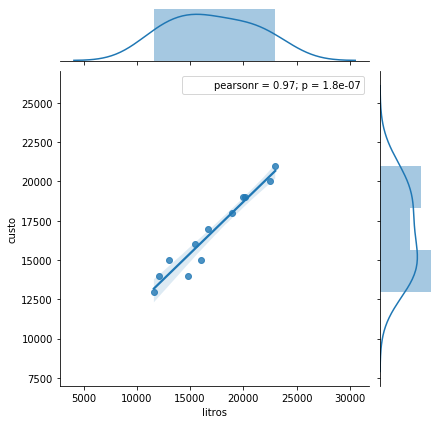

In [71]:
from scipy import stats
g = sns.jointplot(df['litros'], df['custo'], kind='reg')
g.annotate(stats.pearsonr)
plt.show()

In [73]:
# Coeficiente de determinação (r^2)
from sklearn.metrics import r2_score
print(r2_score(df['litros'], df['custo']))

0.8494975742373492


### Relação entre variáveis categóricas

In [76]:
df = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


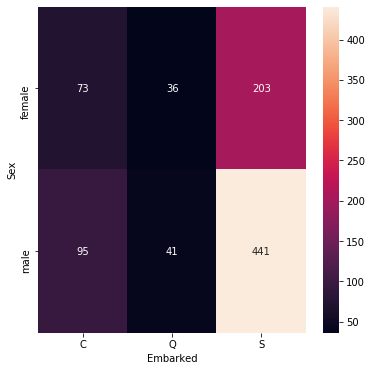

In [79]:
# Existe uma relação entre o sexo das pessoas e onde elas embarcam?
# crosstab -> tabela de contingência
ctab = pd.crosstab(df['Sex'], df['Embarked'])
sns.heatmap(ctab, annot=True, fmt='g') # converter para número inteiros
plt.show()